# Session 3: Linear Regression with a single variable.

## House sale-value prediction using the Boston housing dataset

------------------------------------------------------
*Introduction to Data Science & Machine Learning*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

## Importing Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston



%matplotlib inline

### Boston housing database

We are going to use as running example for explaining linear regression the following [database](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). **We will try to predict the value of houses in the suburbs of Boston during the 80's ussing different features.** 

Note this is **not** the data set you used for Session 1 and Homework 0, we will back to it for Homework 2.

Data is stored in a CVS file containing the following fields


Attribute Information can be found [here](https://www.kaggle.com/c/boston-housing).


### Loading Data

We will manage the database using [Panda's library and Dataframes](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)

In [2]:
#Checking pandas version

pd.__version__

'0.22.0'

Let's read the data in a DataFrame

In [3]:
housing_data=pd.read_csv('./Boston_train.csv')

housing_data.head(10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


We can check the type of data in each column as follows:

In [4]:
# With the method .dtypes, we can check the data type of each column

print(housing_data.dtypes)


ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object


## Checking missing data

Before jump into the regression problem, lets verify that the data does not contain any missing attribute. We will explain how to deal with missing data later in the course.

In [5]:
empty = housing_data.apply(lambda col: pd.isnull(col))
empty.sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Ok, no missing data in our DataFrame. For our experiments, we are going to consider only one variable to predict the sale-value of a house: the number of rooms. Further, to illustrate important concepts such as the overfitting, we are going to use a very small portion of the data set. In particular, we take at random  N_samples rows in the DataFrame. We leave the rest for validating our model.

In [6]:
N_samples = 10

mask = np.random.permutation(len(housing_data))

np.random.seed(seed=10) #To fix the random seed

regression_data_frame = housing_data[['rm','medv']].iloc[list(mask[0:N_samples])]

regression_data_frame.head(5)


,rm,medv
275,6.202,10.9
323,5.093,8.1
225,5.968,18.7
90,5.822,18.4
292,6.655,15.2


In [7]:
len(regression_data_frame)

10

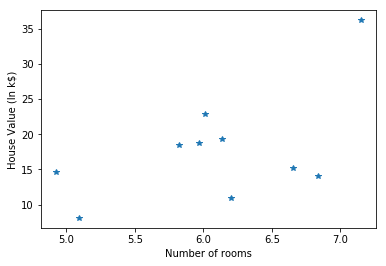

In [8]:
plt.plot(regression_data_frame['rm'],regression_data_frame['medv'],'*')
plt.xlabel('Number of rooms')
plt.ylabel('House Value (In k$)')

___

### The linear regression model


Consider we have a **training** database of $N$ entries of the form $(\mathbf{x}^{(i)},y^{(i)})$, where $\mathbf{x}^{(i)}\in\mathbb{R}^D$ and $y^{(i)}\in\mathbb{R}$. 

Each of the entries $x_i$ of $\mathbf{x}=[x_1, \ldots, x_D]$ is called a **feature**.

We will use this training set to fit a model of the form

$$y \approx \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_D x_D, $$

where $\theta_0$ is called the **intercept**, and it captures the **bias** level of y. In the following, we will assume that the first entry of $\mathbf{x}$ is 1, i.e., $\mathbf{x}=[1, x_1, \ldots, x_D]$ so we can compactly write

$$ y \approx \boldsymbol{\theta}^T\mathbf{x}$$

This regression model is called a ** linear regression ** model since we approximate the target $y$ as a linear combination of the features.


---


### Features can be a non-linear transformation of a given input!

Note that the above model ** does not** mean that we cannot use a linear regression model to interpolate a non-linear function w.r.t. to a given input. For instance, we can try to predict the value of the house using the variable $NR$ (average number of rooms) using the following set of **features**:

$$\mathbf{x} = [1,NR,NR^2,NR^3,\ldots,NR^D],$$ 

which assumes we are approximating the function $NR\rightarrow y$ with an $D$-th order polynomial. Once the features are defined, then note that our goal is to find $\boldsymbol{\theta}\in\mathbb{R}^{D+1}$ such that
$$ y \approx \boldsymbol{\theta}^T\mathbf{x},$$
and this is still a **linear regression model**.


____

### A quadratic loss function

In order to fit $\boldsymbol{\theta}$, we need to define a **cost** or **loss** function, that penalizes how much error our model makes when estimating each data in our **training** set.

Since we are estimating real-valued quantities, the **average training squared error** is a good measure:

$$J_{train}(\boldsymbol{\theta}) = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\boldsymbol{\theta}^T\mathbf{x}^{(i)})^2$$

Thus, we have to find 

$$\boldsymbol{\theta}^* = \arg \min_{\theta} \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\boldsymbol{\theta}^T\mathbf{x}^{(i)})^2 $$

Fortunately, regardless the dimension of $\theta$, this is a well-behaved problem that we will easily solved. The main reason is that the function $J_{train}(\boldsymbol{\theta})$ is [**convex**](http://mathworld.wolfram.com/ConvexFunction.html) w.r.t. $\boldsymbol{\theta}$, and thus it has a **unique minimum**.

Lets plot the function $$J_{train}(\boldsymbol{\theta})$$ for a simple regression model where we aproximate the house value $y$ with a linear function of the number of rooms

$$\mathbf{x} = [1,NR]$$
and thus $\boldsymbol{\theta}\in\mathbb{R}^2$, and we use *one single* datapoint.

0.00900217356974
0.000437215087901


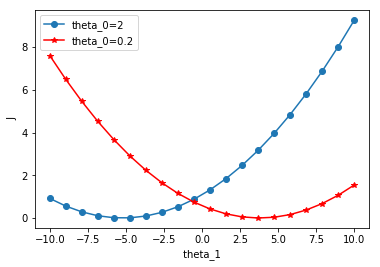

In [9]:
import matplotlib

def cost_function(theta_0,theta_1,y,x):
    J = (y-(x[0]*theta_0+x[1]*theta_1))**2
    return J


# Create simple data
x=np.array([1,0.2])

y = 0.2 * x[0] + 2.3 * x[1] + np.random.randn(1,1)*np.sqrt(0.05) #add a small noise

# We fix theta_0 to easily illustrate J(theta) in one dimension
theta_0 = 2 #Not the right one, but it does not change the convexity of J

theta_1 = np.linspace(-10, 10, 20)
theta_0m, theta_1m = np.meshgrid(theta_0, theta_1)

data_point_index = 2 #One single data point to visualize J(theta)

J = cost_function(theta_0m,theta_1m,y,x)
print(np.min(J))

plt.plot(theta_1,J,'-o')
plt.xlabel(' theta_1 ')
plt.ylabel(' J')

theta_0 = 0.2 #The right one
theta_0m, theta_1m = np.meshgrid(theta_0, theta_1)

J = cost_function(theta_0m,theta_1m,y,x)

print(np.min(J))
plt.plot(theta_1,J,'-*r')
plt.xlabel(' theta_1 ')
plt.ylabel(' J')
plt.legend(['theta_0=2','theta_0=0.2'])



### Optimizing the loss function: the least-squares solution and gradient descend

The problem
$$\boldsymbol{\theta}^* = \arg \min_{\theta} \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\boldsymbol{\theta}^T\mathbf{x}^{(i)})^2 $$
has indeed closed form solution, which is known as the **least-squares** or the **normal equation**:

$$\boldsymbol{\theta}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y},$$
where
- $\mathbf{X}_{N\times (D+1)}$ is the feature matrix, where the $i$-th row is $\mathbf{x}^{(i)}$

- $\mathbf{y}_{(N\times 1)}$ is the target vector
- $ (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}$ is the [Moore–Penrose inverse](http://mathworld.wolfram.com/Moore-PenroseMatrixInverse.html) of $\mathbf{X}$.


The normal equation can be proved by computing the gradient of $J_{train}(\boldsymbol{\theta})$ and set it to zero. ** You will have to show it in the homework, and write the details in [Latex](https://www.latex-tutorial.com/tutorials/), inside the notebook.**

Nonetheless, finding $\boldsymbol{\theta}^*$ by directly solving the normal equation has many important drawbacks:
- You need to keep the full target matrix $\mathbf{X}_{N\times (D+1)}$ in memory, which can be huge in large datasets!
- You need to invert the matrix $(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}$ $\Rightarrow$ $\mathcal{O}(D^3)$ complexity.
- For small data sets ($N\leq D$), $(\mathbf{X}^T\mathbf{X})^{-1}$ can be non-invertible!
- Once you get new data, how do you update $\boldsymbol{\theta}^*$?

For these reasons, among many others, **we typically do not use the normal equation** but we rather apply numerical optimization methods such as **gradient descend** (GD).

In this notebook, we will apply the normal equation. In the next lesson we will learn how to address the optimization stage using GD. 

____

### Normalizing our input data

One last comment. In general, solving the Linear Regression problem is numerically more challenging (both using the normal equation or using GD) if features are defined in different ranges. I.e., if $x_1$ for instance takes values in the $[-1,1]$ set and $x_2$ takes values in the $[-10^6,10^6]$ range. 

To improve both the numerical robustness of our estimator and **enhance interpretability**, we will apply a linear normalization preprocessing stage to use as input to the linear regression features with (sample) mean 0 and (sample) variance equal to 1. ** Recall not to normalize the column corresponding to the intercept**.

Given the unnormalized feature matrix $\mathbf{X}_{N\times D+1}$, we compute the sample mean per feature column , $\mu_j$, and the sample variance per  feature column, $\sigma^2_j$ for $j=2,\ldots,D+1$. Then, each row of the normalized feature matrix $\overline{\mathbf{X}}_{N\times D+1}$ is obtained as follows:

$$\overline{\mathbf{x}}^{(i)}= \left[1, ~~ \frac{x_1^{(i)}-\mu_1}{\sqrt{\sigma^2_1}}, ~~ \frac{x_1^{(i)}-\mu_2}{\sqrt{\sigma^2_2}}, \ldots, \frac{x_1^{(D)}-\mu_1}{\sqrt{\sigma^2_D}}\right]$$

**Note this does not affect to the linear regression solution**, we are simply re-scaling the parameter vector $\boldsymbol{\theta}^*$. Using this scaling, we can now effectively compare the effect that each variable has in the linear regression solution: **the larger $|\theta_j|$ is, the more effect $j$-th feature has in the estimation of $y$**.

One last thing, in general we will not normalize the output variable $y$. We can do it and but typically it leads to mistakes in the evaluation of the cost function. 
_____

## Visualizing the Least Squares Solution with Polynomial Features

Lets go back to our running example, estimating the house value using the average number of rooms.  We will use polynomials with different order to visualize the solution. 

First, we use a second order polynomial. Thus each (unnormalized) feature vector is 

$$\mathbf{x} = [1,NR,NR^2]$$

Note that we need to create $NR^2$ before normalizing! Try to think about why is that ...



The LS solution is: [ 17.84       -23.73744158  27.87822505]


<Container object of 3 artists>

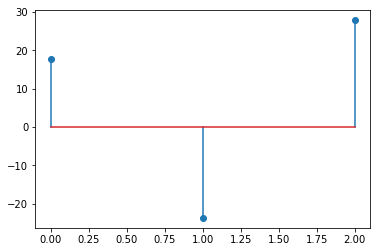

In [10]:
X_0 = np.array(regression_data_frame['rm'])    #I use the _0 to avoid overwritting this variable with the normalization
Y = np.array(regression_data_frame['medv'])

# Including quadratic features ...

X = np.stack([X_0,X_0**2],1) # To concatenate a-dimensional vectors

# Normalizing 
train_mean = np.mean(X,0)
train_std = np.std(X,0)

X -= train_mean
X /= train_std

deg_max =2

# This is not data! Just to visualize the polynomial
values = np.sort(np.append(np.arange(4,10,0.01),X_0))

X_plot = np.zeros([values.shape[0],deg_max])

deg=1
while deg<=deg_max:
    X_plot[:,deg-1] = values**deg 
    deg += 1
    
# Normalizing 

X_plot -= train_mean            ## Note we are normalizing using the training mean and std!!
X_plot /= train_std             ## Note we are normalizing using the training mean and std!!


# We add the intercept column
col_ones_plot = np.ones([X_plot.shape[0],1])
col_ones = np.ones([X.shape[0],1])

X = np.concatenate([col_ones,X],1)
X_plot = np.concatenate([col_ones_plot,X_plot],1)

# Compute the Least-Squares solution

T2 = np.linalg.pinv(X) @ Y         #You have to use np.dot() in Python 2.7 instead of @

print("The LS solution is:", T2)

plt.stem(T2)

Lets visualize how it fits the ** training data **:

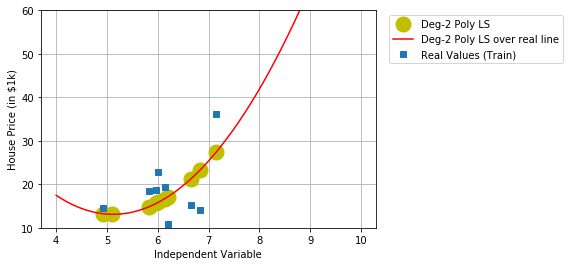

In [11]:
#inds_plot=np.argsort(X_0) # To help visualization of the fitting, we order according to the normalize variable NR (order one coefficient)

Y_estimated_train_deg_2 = X @ T2.transpose()
Y_estimated_plot_2 = X_plot @ T2.transpose()    

leg2='Deg-2 Poly LS' 

plt.figure()
plt.plot(X_0,Y_estimated_train_deg_2,'yo',ms=15,label=leg2)
plt.plot(values,Y_estimated_plot_2,'r-',ms=20,label=leg2 + ' over real line')

plt.plot(X_0,Y,'s', label='Real Values (Train)')
plt.xlabel('Independent Variable')
plt.ylabel('House Price (in $1k)')
plt.ylim([10,60])    
plt.grid(True)
plt.legend(loc=9, bbox_to_anchor=(1.3, 1))


plt.rcParams["figure.figsize"] = [8,8]

## Repeat the experiment for a polynomial interpolation of degree 20

The LS solution is: [  1.78387681e+01  -8.06508514e+10   5.65738365e+11  -1.64474990e+12
   2.39894443e+12  -1.37560742e+12  -9.80407495e+11   2.35852308e+12
  -1.81870975e+12   6.81048480e+11  -1.04129108e+11]


<Container object of 3 artists>

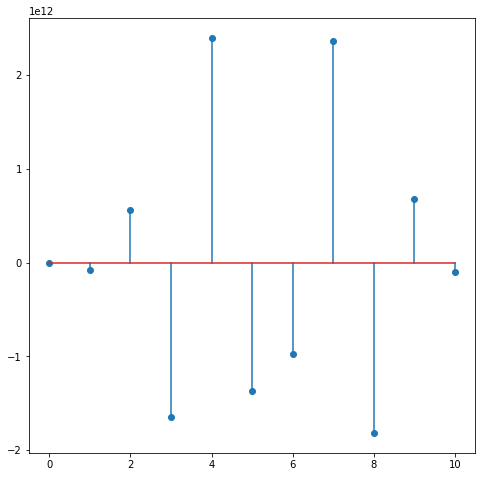

In [12]:
# Including quadratic features ...
deg_max = 10
X = np.zeros([X_0.shape[0],deg_max])

deg=1
while deg<=deg_max:
    X[:,deg-1] = X_0**deg 
    deg += 1
    
# Normalizing 
train_mean = np.mean(X,0)
train_std = np.std(X,0)

X -= train_mean
X /= train_std




X_plot = np.zeros([values.shape[0],deg_max])

deg=1
while deg<=deg_max:
    X_plot[:,deg-1] = values**deg 
    deg += 1
    
# Normalizing 

X_plot -= train_mean            ## Note we are normalizing using the training mean and std!!
X_plot /= train_std             ## Note we are normalizing using the training mean and std!!

# We add the intercept column

col_ones = np.ones([X.shape[0],1])
col_ones_plot = np.ones([X_plot.shape[0],1])

X = np.concatenate([col_ones,X],1)
X_plot = np.concatenate([col_ones_plot,X_plot],1)

# Compute the Least-Squares solution

T20 = np.linalg.pinv(X) @ Y         #You have to use np.dot() in Python 2.7 instead of @

print("The LS solution is:", T20)

plt.stem(T20)

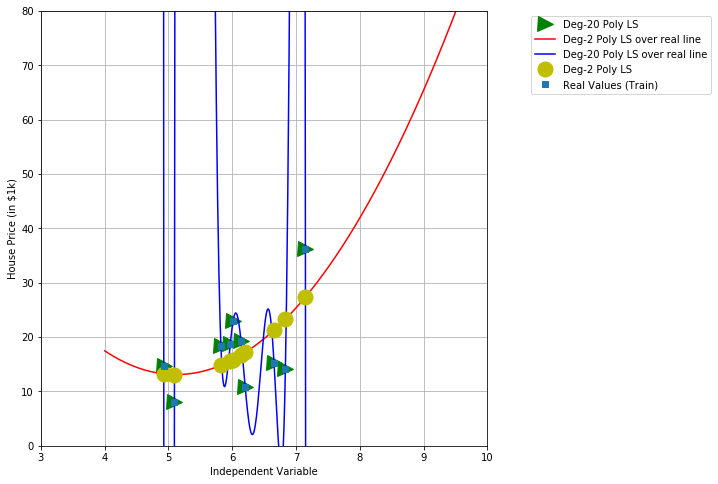

In [13]:
Y_estimated_train_deg_20 = X @ T20.transpose()    
Y_estimated_plot_20 = X_plot @ T20.transpose()    

leg20='Deg-20 Poly LS' 

plt.figure()
plt.plot(X_0,Y_estimated_train_deg_20,'g>',ms=15,label=leg20)
plt.plot(values,Y_estimated_plot_2,'r-',ms=20,label=leg2 + ' over real line')
plt.plot(values,Y_estimated_plot_20,'b-',ms=20,label=leg20 + ' over real line')
plt.plot(X_0,Y_estimated_train_deg_2,'yo',ms=15,label=leg2)



plt.plot(X_0,Y,'s', label='Real Values (Train)')
plt.xlabel('Independent Variable')
plt.ylabel('House Price (in $1k)')
plt.ylim([0,80])   
plt.xlim([3,10])
plt.grid(True)
plt.legend(loc=9, bbox_to_anchor=(1.3, 1))



plt.rcParams["figure.figsize"] = [8,8]

Which one do you think performs better??

It depends, isn't it?

We will use the following two metrics to diagnose how well our model is performing.

- **Training Error**: The function we have used to obtain $\boldsymbol{\theta}^*$, evaluated at $\boldsymbol{\theta}^*$
$$J_{train}(\boldsymbol{\theta}^*) = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-(\boldsymbol{\theta}^*)^T\overline{\mathbf{x}}^{(i)})^2$$

- **Test Error**: We need to evaluate how well our data **generalizes to data we have never seen!** This is the real point of Machine Learning! Learn from data to adapt! To emulate this effect, we have a test-database **which is never used for model training!** and is only used to evaluate generalization. If $\tilde{\mathbf{x}}^{(i)}$, $i=1,\ldots,N_{Test}$ is the $i$-th normalized testa data point, then the **Test Error** is constructed as follows.

$$J_{test}(\boldsymbol{\theta}^*) = \frac{1}{N_{Test}} \sum_{i=1}^{N_{Test}} (y^{(i)}-(\boldsymbol{\theta}^*)^T\tilde{\mathbf{x}}^{(i)})^2$$

One important thing, we normalize the test data using the sample means and variances computed from the **training** set. This is important to **make sure that all datapoints are equally normalized**.

Before computing both metrics, lets plot some test datapoints in the above figure to have an idea about how both models (deg-2 and deg-20 polynomials) will generalize. Lets use some data points not used for training.

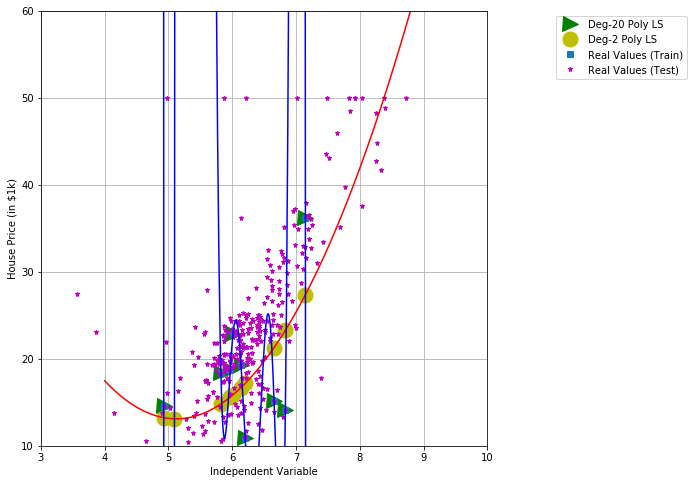

In [14]:
regression_data_frame_test = housing_data[['rm','medv']].iloc[N_samples:-1]

regression_data_frame_test.head(5)

X_0_test = np.array(regression_data_frame_test['rm']) 
Y_test = np.array(regression_data_frame_test['medv'])

plt.figure()
plt.plot(X_0,Y_estimated_train_deg_20,'g>',ms=15,label=leg20)
plt.plot(X_0,Y_estimated_train_deg_2,'yo',ms=15,label=leg2)

plt.plot(X_0,Y,'s', label='Real Values (Train)')
plt.plot(X_0_test,Y_test,'m*', ms=5, label='Real Values (Test)')
plt.xlabel('Independent Variable')
plt.ylabel('House Price (in $1k)')
plt.ylim([10,60])    
plt.xlim([3,10]) 
plt.grid(True)
plt.legend(loc=9, bbox_to_anchor=(1.3, 1))

plt.plot(values,Y_estimated_plot_2,'r-',ms=20,label=leg2 + ' over real line')
plt.plot(values,Y_estimated_plot_20,'b-',ms=20,label=leg20 + ' over real line')

plt.rcParams["figure.figsize"] = [8,8]



## Goals for today

Using the  data in `regression_data_frame` for training and the data in `regression_data_frame_test` for test

1) Represent in the figure above the House value estimated by both models (degree-2 interpolation, degree-20 interpolation) **for the test set**.

2) Compute both $J_{train}(\boldsymbol{\theta}^*)$ and $J_{test}(\boldsymbol{\theta}^*)$ for the two regression models.

I use a generic code I can re-use for future sessions ...


In [15]:
# A function that normalizes data with pre-scecified mean and std. 
def normalize(X,mu=0,std=1,flag_train=True):
    if(flag_train):
        mu = np.mean(X,0)
        std = np.std(X,0)
    
    X -= mu
    X /= std
    
    return X,mu,std

# A function to add the all-ones column
def add_interfit(X):
    col_ones = np.ones([X.shape[0],1])
    return np.concatenate([col_ones,X],1)

# A function to create the normalized function with polynomial features up to degree deg_max
def create_feature_matrix(X_0,deg_max,mu=0,std=1,flag_train=True):
    X = np.zeros([X_0.shape[0],deg_max])
    
    deg=1
    while deg<=deg_max:
        X[:,deg-1] = X_0**deg 
        deg += 1
    
    X,train_mean,train_std = normalize(X,mu,std,flag_train)
    
    X = add_interfit(X)
    
    return X,train_mean,train_std
    
# A function to compute the LS solution
def LS_solution(X,Y):
    return (np.linalg.pinv(X) @ Y)        

# A function to evaluate the LS solution
def LS_evaluate(X,T):
    return (X @ T.transpose())

def J_error(Y,Y_est):
    return np.mean((Y-Y_est)**2)
    
# A function to compute the test, training data for given data inputos and for a list of polynomial degrees
def eval_J(X_train,X_test,deg_list,Y_train,Y_test,N):
    
    # Lets compute the normalized feature matrices F_train, F_test
    F_train,train_mean,train_std = create_feature_matrix(X_train,np.max(deg_list),0,1,flag_train=True)
    
    F_test,_,_ = create_feature_matrix(X_test,np.max(deg_list),train_mean,train_std,flag_train=False)
    
    
    J_train = []
    T = []
    J_test = []

    
    for d in deg_list:
        #We train with N random points (this is useful to plot learning curves)
        mask = np.random.permutation(X_train.shape[0])
        
        T.append(LS_solution(F_train[mask[:N],0:d+1],Y_train[mask[:N]]))
        J_train.append(J_error(Y_train[mask[:N]],LS_evaluate(F_train[mask[:N],0:d+1],T[-1])))
        J_test.append(J_error(Y_test,LS_evaluate(F_test[:,0:d+1],T[-1])))
        
    return J_train,T,J_test
    
    

In [16]:
# We compute the training and test errors
deg_list = np.arange(1,20,1)
J_train,T,J_test = eval_J(X_0,X_0_test,deg_list,Y,Y_test,N_samples)


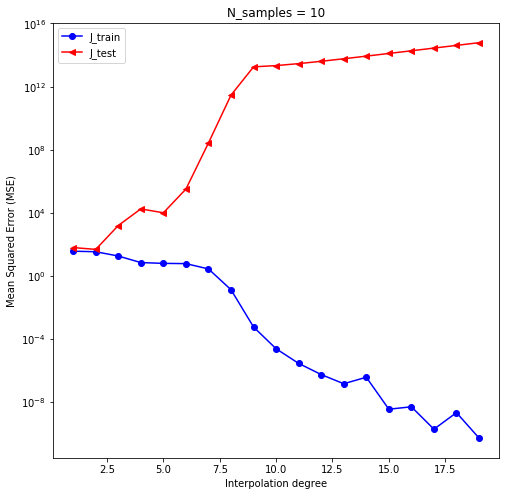

In [17]:
plt.semilogy(deg_list,J_train,'b-o',label='J_train')
plt.semilogy(deg_list,J_test,'r-<',label='J_test')
plt.xlabel('Interpolation degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('N_samples = %d' %(N_samples))
plt.legend()